In [34]:
import numpy as np
import pandas as pd
import scipy as sp
import scipy.integrate as integrate
import matplotlib.pyplot as plt

### Funciones a usar

In [83]:
def valores_grafica(parametros_variables):
    h,w_b,w_m,ns=parametros_variables
    
    z_dec=1090
    N_eff=3046
    w_gamma=2.47*10**(-5)
    #w_r=(1+7/8*N_eff*(4/11)**(4/3))*w_gamma
    w_r=4.17*10**(-5)
    w_lamb=h**2-w_m-w_r
    A_s=2.2*10**(-9)
    k_0=0.05
    print(w_r)
    H_0=h/2998
    
    def R(z):
        return w_b*(3.04*10**4)/(1+z)
    
    def c_s(z):
        c=(1/3)*(1+R(z))
        return np.sqrt(c)
    
    def T(x):
        parte1=np.log(1+0.171*x)/(0.171*x)
        parte2=(1 + 0.284*x + np.power(1.18*x,2) + np.power(0.399*x,3) + np.power(0.49*x,4))**(-0.25)
        return parte1*parte2
    
    def E_inv(z):
        parte1=w_m*np.power((1+z),3) + w_r*np.power((1+z),4) + w_lamb
        #parte1=w_m*((1+z)**3) + w_r*((1+z)**4)+w_lamb
        return (np.sqrt(parte1)/h)**(-1)
    
    def P_R(k):
        return A_s*(k/k_0)**(ns-1)
    
    def func_int_rs(z):
        return c_s(z)*E_inv(z)
    
    def func_bessel(x,l):
        if x>l:
            return 0.5/(x*np.sqrt(np.power(x,2)-np.power(l,2)))
        else:
            return 0
        
    d_A = integrate.quad(E_inv,0,z_dec)[0]/H_0
    r_s=integrate.quad(func_int_rs,z_dec,np.inf)[0]/H_0
    k_eq=0.073*w_m
    k_d=0.14
    
    print("R(Z_dec)={:.5f}, d_A={:.5f} y r_s={:.5f}".format(R(z_dec),d_A,r_s))
    
    l_minimo=100
    l_maximo=1501
    l_array=np.array(range(l_minimo,l_maximo))
    longitud=len(l_array)
    cl=np.zeros(longitud)
    
    
    def c_l_funcion(l):
        
        def func_int(k):
            const=4*np.pi*9/25
            parte1=P_R(k)
            parte2=np.power(-R(z_dec)*T(k/k_eq)+5/3*np.cos(k*r_s)*np.exp(-(k/k_d)**2),2)
            parte3=func_bessel(k*d_A,l)/k
            return parte1*parte2*parte3
        
        limite_sup=np.inf
        limite_inf=0 #l/(d_A**2)
        return integrate.quad(func_int,limite_inf,limite_sup)[0]
    
    i=0
    for l in l_array:
        valor=c_l_funcion(l)
        cl[i]=valor*l*(l+1)/(2*np.pi)
        i+=1
    
    plt.figure(figsize=(10,7))
    plt.title("Espectro Angular de Temperaturas")
    plt.ylabel("$l(l+1)C_l/2\pi$")
    plt.xlabel("l")
    plt.plot(l_array,cl)
            
        

4.1700000000000004e-05
R(Z_dec)=0.61302, d_A=14002.41298 y r_s=183.10683


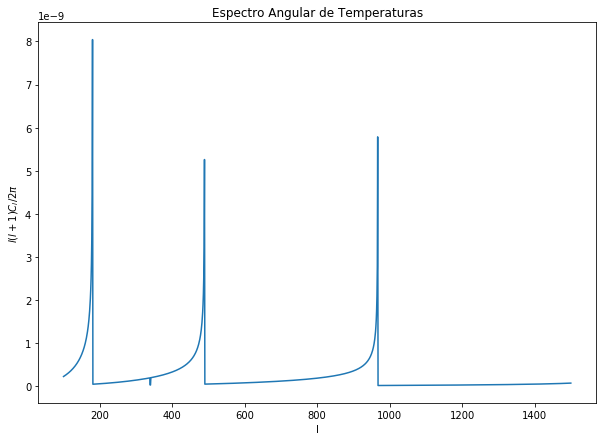

In [84]:
parametros=0.67,0.022,0.14,0.97 #h,w_b,w_m,ns

valores_grafica(parametros)

In [56]:
?integrate.quad